In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
SP = pd.read_csv('data/^GSPC.csv').dropna()
SP = SP[['Date', 'Close']]
TR = pd.read_csv('data/^TNX.csv').dropna()
TR = TR[['Date', 'Close']]
x = pd.merge(SP, TR, how='left', on='Date')
x.Close_y = x.Close_y.fillna(method='ffill')
x = x.dropna()

In [3]:
x.index = pd.to_datetime(x.Date)
# x = x.drop('Date', axis=1)
df = x.rename(columns={'Close_x': 'sp', 'Close_y': 'tr'})
df.head()

,Date,sp,tr
Date,,,
1962-01-02,1962-01-02,70.959999,4.06
1962-01-03,1962-01-03,71.129997,4.03
1962-01-04,1962-01-04,70.639999,3.99
1962-01-05,1962-01-05,69.660004,4.02
1962-01-08,1962-01-08,69.120003,4.03


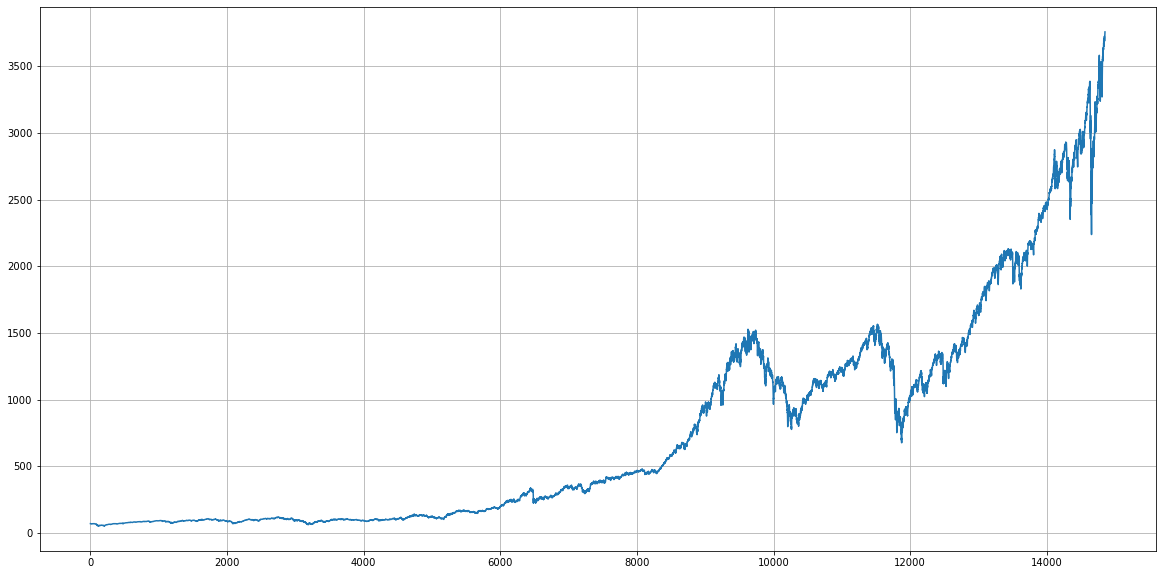

In [4]:
plt.figure(figsize=(20,10))
plt.plot(np.array(df.sp))
plt.grid()

In [5]:
scale = {0: 100, 2000: 100, 4000: 250, 6000: 500, 8000: 1600, 10000: 1600, 12000: 2500, 14000: 3800}

In [6]:
for i in range(2000, 4000):
    print(i, np.array(df.sp)[i])

2000 89.949997
2001 90.040001
2002 89.370003
2003 88.16999799999999
2004 87.620003
2005 86.790001
2006 85.690002
2007 85.019997
2008 85.75
2009 86.769997
2010 86.239998
2011 85.900002
2012 86.33000200000001
2013 87.010002
2014 86.099998
2015 86.940002
2016 86.730003
2017 86.540001
2018 86.470001
2019 86.370003
2020 87.440002
2021 87.760002
2022 88.029999
2023 87.989998
2024 89.349998
2025 88.900002
2026 89.5
2027 89.709999
2028 90.230003
2029 90.040001
2030 90.0
2031 89.440002
2032 88.510002
2033 88.75
2034 88.690002
2035 88.33000200000001
2036 87.860001
2037 86.910004
2038 87.290001
2039 87.540001
2040 87.41999799999999
2041 87.059998
2042 86.989998
2043 87.980003
2044 89.769997
2045 89.91999799999999
2046 89.629997
2047 89.629997
2048 90.07
2049 89.790001
2050 89.389999
2051 88.760002
2052 88.519997
2053 88.489998
2054 88.529999
2055 88.239998
2056 87.639999
2057 86.889999
2058 86.730003
2059 85.879997
2060 85.66999799999999
2061 85.83000200000001
2062 85.379997
2063 84.269997
2064 8

2814 112.68
2815 112.58000200000001
2816 112.08000200000001
2817 111.440002
2818 110.940002
2819 111.540001
2820 112.16999799999999
2821 111.57
2822 109.989998
2823 108.339996
2824 108.889999
2825 107.230003
2826 106.970001
2827 107.099998
2828 108.43
2829 110.220001
2830 111.0
2831 110.529999
2832 111.25
2833 110.440002
2834 109.540001
2835 108.16999799999999
2836 105.900002
2837 106.57
2838 106.43
2839 105.559998
2840 103.860001
2841 102.730003
2842 103.58000200000001
2843 104.07
2844 107.139999
2845 107.940002
2846 107.510002
2847 105.910004
2848 104.949997
2849 103.93
2850 102.970001
2851 104.620003
2852 104.309998
2853 105.839996
2854 107.029999
2855 106.699997
2856 108.290001
2857 107.599998
2858 106.400002
2859 105.099998
2860 103.599998
2861 103.989998
2862 104.440002
2863 103.209999
2864 103.699997
2865 102.25
2866 103.300003
2867 103.620003
2868 104.690002
2869 104.260002
2870 102.900002
2871 101.870003
2872 101.779999
2873 101.279999
2874 102.139999
2875 103.519997
2876 105.

3537 102.099998
3538 101.610001
3539 102.029999
3540 101.690002
3541 100.110001
3542 99.709999
3543 100.019997
3544 100.58000200000001
3545 99.980003
3546 98.91999799999999
3547 99.110001
3548 100.190002
3549 100.58000200000001
3550 100.940002
3551 101.889999
3552 100.860001
3553 99.800003
3554 100.91999799999999
3555 100.860001
3556 100.449997
3557 100.58000200000001
3558 100.709999
3559 102.239998
3560 103.41999799999999
3561 102.849998
3562 102.849998
3563 102.410004
3564 102.010002
3565 102.769997
3566 102.239998
3567 102.25
3568 103.510002
3569 103.360001
3570 102.209999
3571 101.279999
3572 100.349998
3573 100.199997
3574 101.050003
3575 100.309998
3576 100.66999799999999
3577 101.440002
3578 102.870003
3579 103.32
3580 102.980003
3581 102.290001
3582 102.43
3583 101.860001
3584 102.129997
3585 102.129997
3586 101.639999
3587 100.91999799999999
3588 101.459999
3589 100.879997
3590 101.160004
3591 101.879997
3592 103.099998
3593 102.949997
3594 102.769997
3595 102.160004
3596 101.

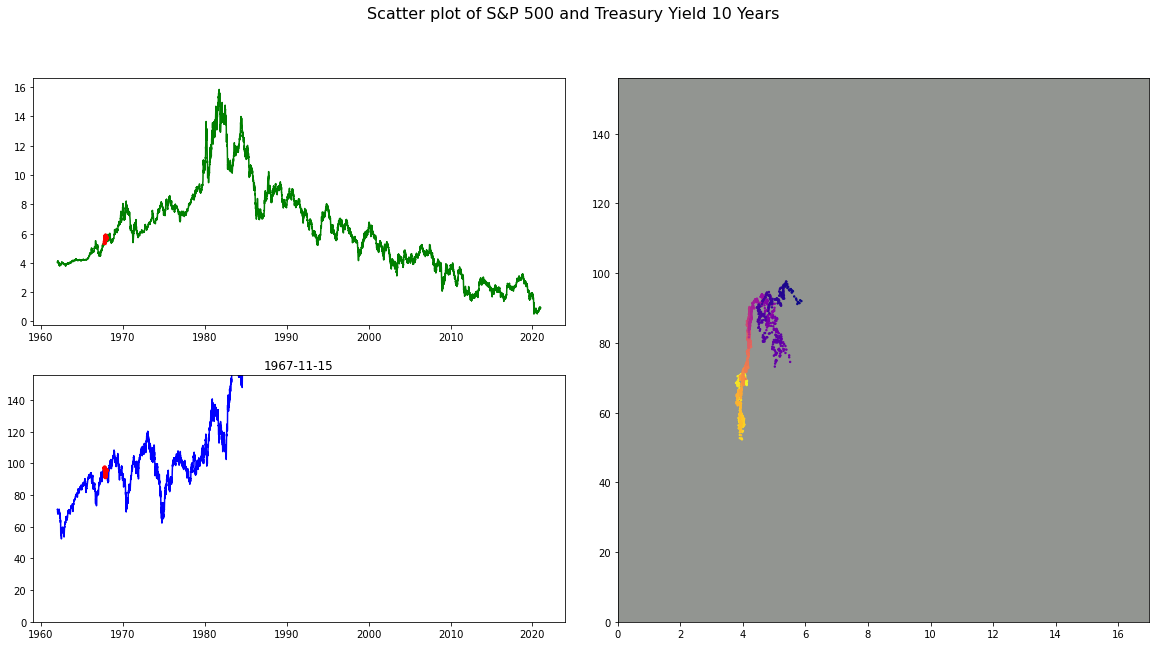

<Figure size 432x288 with 0 Axes>

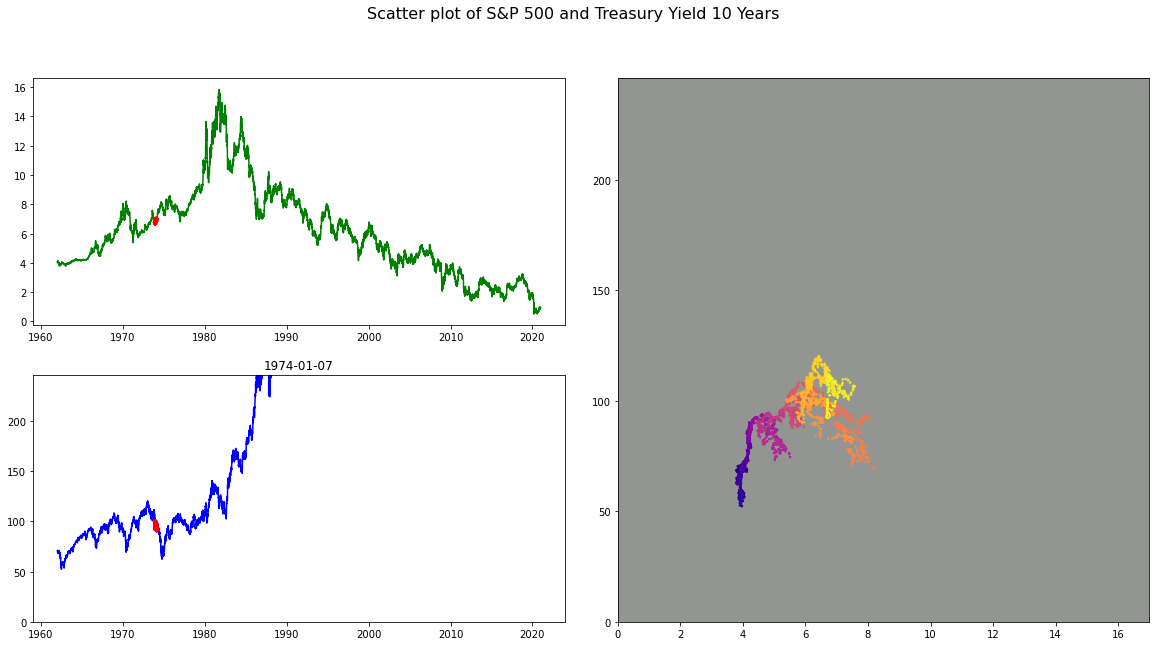

<Figure size 432x288 with 0 Axes>

In [7]:
# scale = {0: 100, 2000: 100, 4000: 250, 6000: 500, 8000: 1600, 10000: 1600, 12000: 2500, 14000: 3800}
win = 30

for i in (1480, 3000):
    scale_y = 100*(np.exp(0.0003*i))
    if scale_y > 4000:
        scale_y = 4000
    
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(20, 10)
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    fig.subplots_adjust(wspace=0.1)
#     fig.subplots_adjust(hspace=0.1)
    
    ax0.plot(df.tr, color='g')
    ax0.plot(df.tr[i-win:i+win], color='r', linewidth=4.0)
    fig.suptitle('Scatter plot of S&P 500 and Treasury Yield 10 Years', fontsize=16)
    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i-win:i+win], color='r', linewidth=4.0)
    ax2.set_title(f'{df.Date[i]}')
    ax2.set_ylim([0, scale_y])
    
    x = df.tr[:i]
    y = df.sp[:i]
    z = df.index[:i].astype('int')/df.index[:i].astype('int').max()
    
#     xm = np.mean(x)
#     ym = np.mean(y)
#     R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
#     a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
#     b = (np.sum(y) - a*np.sum(x))/len(x)
    ax1.set_facecolor('xkcd:grey')
    color = [float(item) for item in z]
    ax1.scatter(x, y, s=2, c=color, cmap='plasma')
    ax1.set_xlim([0, 17])
    ax1.set_ylim([0, scale_y])
#     ax1.plot([0, 1], [b, a + b], c='r')
    
    plt.show()
    plt.clf()

In [8]:
# win = 30

# for i in range(0, len(df)):
#     scale_y = 100*(np.exp(0.0003*i))
#     if scale_y > 4000:
#         scale_y = 4000
    
#     fig, ax = plt.subplots(nrows=2, ncols=2)
#     fig.set_size_inches(20, 10)
#     ax0 = plt.subplot2grid((2, 2), (0, 0))
#     ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
#     ax2 = plt.subplot2grid((2, 2), (1, 0))
#     fig.subplots_adjust(wspace=0.1)
# #     fig.subplots_adjust(hspace=0.1)
    
#     ax0.plot(df.tr, color='g')
#     ax0.plot(df.tr[i-win:i+win], color='r', linewidth=4.0)
#     fig.suptitle('Scatter plot of S&P 500 and Treasury Yield 10 Years', fontsize=16)
    
#     ax2.plot(df.sp, color='b')
#     ax2.plot(df.sp[i-win:i+win], color='r', linewidth=4.0)
#     ax2.set_title(f'{df.Date[i]}')
#     ax2.set_ylim([0, scale_y])
    
#     x = df.tr[:i]
#     y = df.sp[:i]
#     z = df.index[:i].astype('int')/df.index[:i].astype('int').max()
    
# #     xm = np.mean(x)
# #     ym = np.mean(y)
# #     R = (np.sum((x - xm)*(y - ym)))/((np.sum((x - xm)**2)*np.sum((y - ym)**2))**(1/2))
# #     a = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y))/(np.sum(x)*np.sum(x) - len(x)*np.sum(x*x))
# #     b = (np.sum(y) - a*np.sum(x))/len(x)
#     ax1.set_facecolor('xkcd:grey')
#     color = [float(item) for item in z]
#     ax1.scatter(x, y, s=2, c=color, cmap='inferno')
#     ax1.set_xlim([0, 17])
#     ax1.set_ylim([0, scale_y])
# #     ax1.plot([0, 1], [b, a + b], c='r')
    
#     plt.savefig('E:/Temp/hist/{:04d}.png'.format(i))
#     plt.clf()
#     plt.close('all')